### Import Libraries

In [1]:
# Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries (introducing plotly)
import plotly.graph_objects as go

> **Note**: The energy sector contributes about 40 percent of global emissions of CO2 ([source here](https://openknowledge.worldbank.org/handle/10986/17143?show=full#:~:text=The%20energy%20sector%20contributes%20about,energy%2Dsector%20emissions%20in%202010.)).

## I. Load & Explore Data

In [2]:
# Import the data
energy = pd.read_csv("energy_use_data_11-29-2021.csv")
energy.describe()

Element Code     Item Code     Year Code          Year          Value
count       46131.0  46131.000000  46131.000000  46131.000000   46131.000000
mean         7273.0   6803.571720   1998.988814   1998.988814     863.132722
std             0.0      2.916637     13.111035     13.111035    5274.730687
min          7273.0   6800.000000   1970.000000   1970.000000       0.000000
25%          7273.0   6801.000000   1990.000000   1990.000000       3.370750
50%          7273.0   6804.000000   2000.000000   2000.000000      21.489900
75%          7273.0   6805.000000   2010.000000   2010.000000     165.728900
max          7273.0   6809.000000   2019.000000   2019.000000  197674.559300

In [3]:
energy['Item'].value_counts()

Motor Gasoline                       8756
Gas-Diesel oil                       8160
Liquefied petroleum gas (LPG)        7431
Fuel oil                             6418
Electricity                          6061
Coal                                 4304
Natural gas (including LNG)          3787
Gas-diesel oils used in fisheries     747
Fuel oil used in fisheries            467
Name: Item, dtype: int64

## II. Prepare the Data

In [ ]:
# Import the data
energy = pd.read_csv("energy_use_data_11-29-2021.csv")

# Keep the same countries as in Graph 1
areas_to_keep = ["China","Germany", "Japan", "United States of America"]

# Filter the data
energy = energy[(energy["Area"].isin(areas_to_keep)) & 
                (energy["Year"]==2019)].reset_index(drop=True)

# Rename some Areas
energy["Area"] = energy["Area"].replace(to_replace=["United States of America"],
                                        value=["United States"])

# Group by Area and Item
energy = energy.groupby(["Area", "Item"])["Value"].mean().reset_index()

# Compute percentage per country
totals = energy.groupby("Area")["Value"].sum().reset_index()
energy = pd.merge(energy, totals, on="Area")
energy["Perc"] = energy["Value_x"] / energy["Value_y"]
energy["Perc"] = energy["Perc"].apply(lambda x: round(x*100, 2))

# Look into the dataframe
energy.head()

Area                           Item      Value_x      Value_y   Perc
0  China                           Coal   56612.4024  217671.2249  26.01
1  China                    Electricity  105472.7129  217671.2249  48.46
2  China                       Fuel oil      80.9078  217671.2249   0.04
3  China                 Gas-Diesel oil   47328.8167  217671.2249  21.74
4  China  Liquefied petroleum gas (LPG)     231.0721  217671.2249   0.11

## III. Create the Bubble chart V1 ( Basic Plot)

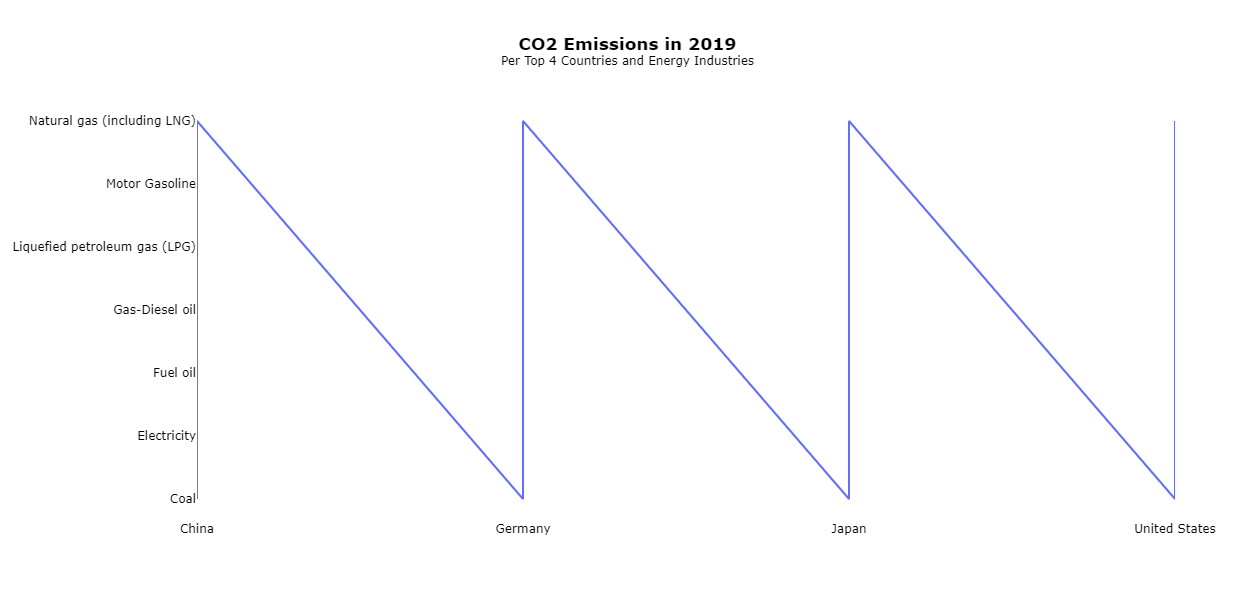

In [ ]:
# Create the layout of the chart
title = "<b>CO2 Emissions in 2019</b><br><sup>Per Top 4 Countries and Energy Industries</sup>"
layout = go.Layout(width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   showlegend = False, 
                   title = {'text' : title, 'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'})

# Create the figure
fig = go.Figure( layout = layout)

fig.add_trace( go.Scatter(
    # X and Y axis
    x=energy["Area"],
    y=energy["Item"],
    
))

# Show the graph
fig.show()

## III. Create the Bubble chart V2 ( Add Title & Update Layout)

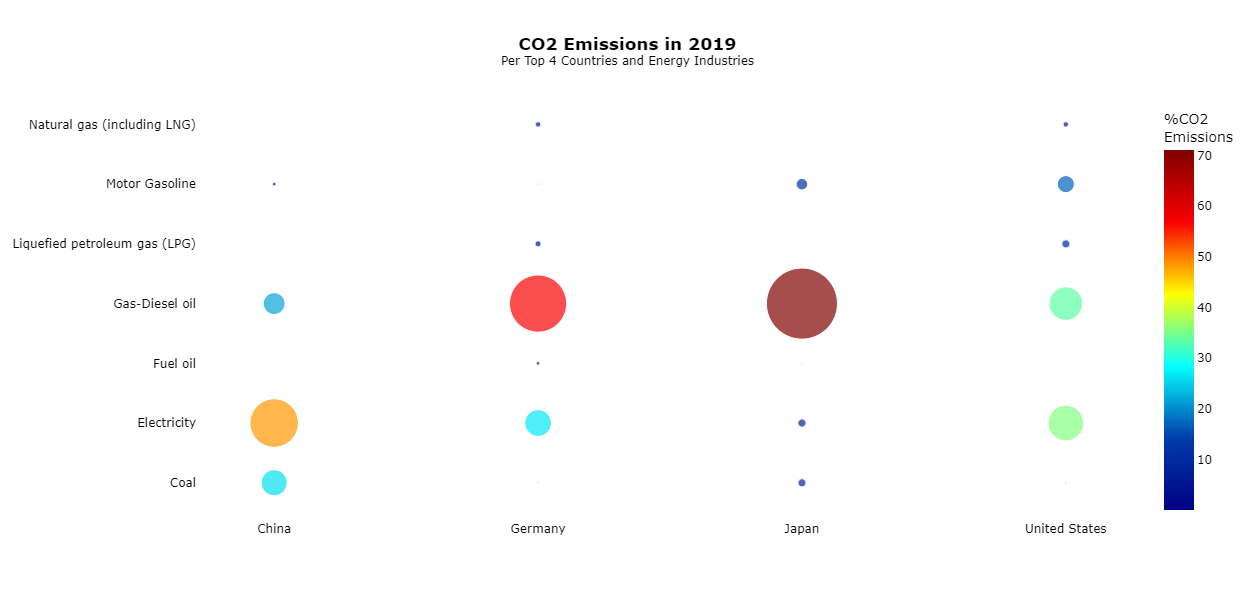

In [ ]:
# Create the layout of the chart
title = "<b>CO2 Emissions in 2019</b><br><sup>Per Top 4 Countries and Energy Industries</sup>"
layout = go.Layout(width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   showlegend = False, 
                   title = {'text' : title, 'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'})

# Create the figure
fig = go.Figure( layout = layout)

# Create the base Scatter Plot
fig.add_trace(go.Scatter(
    # X and Y axis
    x=energy["Area"],
    y=energy["Item"],
    
    # The marker shape and size
    mode='markers', 
    hovertemplate="Country: %{x}<br>" +
                  "Industry: %{y}<br>" +
                  "CO2 Emissions: %{marker.size:,}%" +
                  "<extra></extra>",
    
    marker=dict(color=energy["Perc"],
                size=energy["Perc"],
                showscale=True,
                colorbar=dict(title='%CO2<br>Emissions'),
                opacity=0.7,
                colorscale='Jet')
))

# Show the graph
fig.show()

## III. Create the Bubble Chart Final (Clean up Layout)

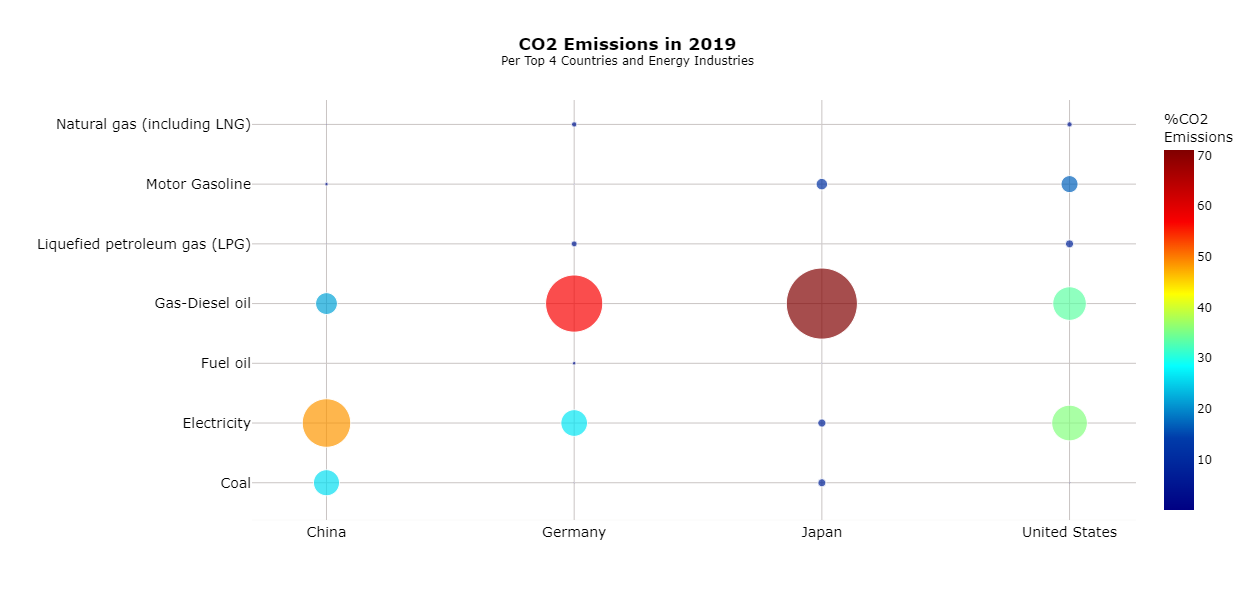

In [ ]:
# Create the layout of the chart
title = "<b>CO2 Emissions in 2019</b><br><sup>Per Top 4 Countries and Energy Industries</sup>"
layout = go.Layout(width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   showlegend = False, 
                   title = {'text' : title, 'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'})

# Create the figure
fig = go.Figure( layout = layout)

# Create the base Scatter Plot
fig.add_trace(go.Scatter(
    # X and Y axis
    x=energy["Area"],
    y=energy["Item"],
    
    # The marker shape and size
    mode='markers', 
    hovertemplate="Country: %{x}<br>" +
                  "Industry: %{y}<br>" +
                  "CO2 Emissions: %{marker.size:,}%" +
                  "<extra></extra>",
    
    marker=dict(color=energy["Perc"],
                size=energy["Perc"],
                showscale=True,
                colorbar=dict(title='%CO2<br>Emissions'),
                opacity=0.7,
                colorscale='Jet')
))

# Update the x and y axis
fig.update_xaxes(showline=True, linewidth=0.1, linecolor='#c9c4c3', gridcolor='#c9c4c3',
                 tickfont=dict(size=14, color='black'), 
                 title="", showgrid=True, tickangle=0)

fig.update_yaxes(showline=False, linewidth=0.1, gridcolor='#c9c4c3',
                 tickfont=dict(size=14, color='black'), 
                 title="", showgrid=True)

# Show the graph
fig.show()

### Benefits of `plotly`:

Plotly brings Data Visualization to a more elevated level. It is a rather "easy" (not simple - but easy to learn) way to bring interactivity to a plot. Moreover, `plotly` adds a few more "graph types" that differenciate from the basic histogram, line chart, bar chart, scatterplot etc. that we are already so acquainted with.

> **Reference**: I was inspired by the amazing notebook on [Data Science in 2021 : Adaptation or Adoption?](https://www.kaggle.com/shivamb/data-science-in-2021-adaptation-or-adoption/notebook) by Shivam Bansal and Kun Hao Yeh. I highly encourage you to browse the winning notebooks from the Kaggle Competitions on [Data Science and Machine Learning Surveys](https://www.kaggle.com/c/kaggle-survey-2021) and take inspiration from them when building your own graphs.

### Further Inquires:

* what is the industry with the biggest impact on CO2 emissions?
* what is the country that has improved the most in reducing its CO2 emissions throughout years?
* have the emissions been increasing or decreasing?
* what is the year with the biggest impact on CO2 emissions?